In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"D:\Internship\Task 2\Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.760000
std,57.879185,13.969007,26.264721,25.823522,1.195637
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [4]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)
sns.set(style="whitegrid")

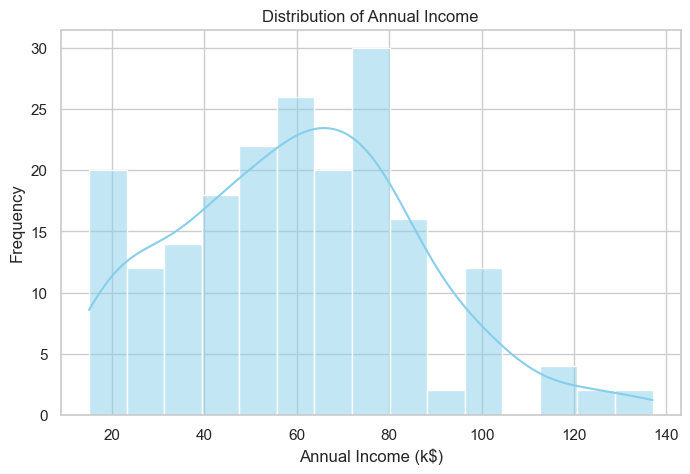

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


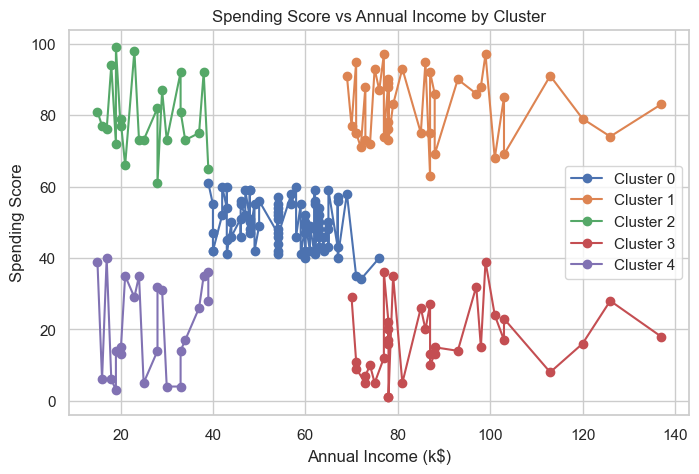

In [7]:
plt.figure(figsize=(8, 5))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster].sort_values('Annual Income (k$)')
    plt.plot(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
             label=f'Cluster {cluster}', marker='o')
plt.title('Spending Score vs Annual Income by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Vikram\AppData\Local\Temp\ipykernel_12844\1893859883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Spending Score (1-100)', data=data, estimator=np.mean, palette='viridis')


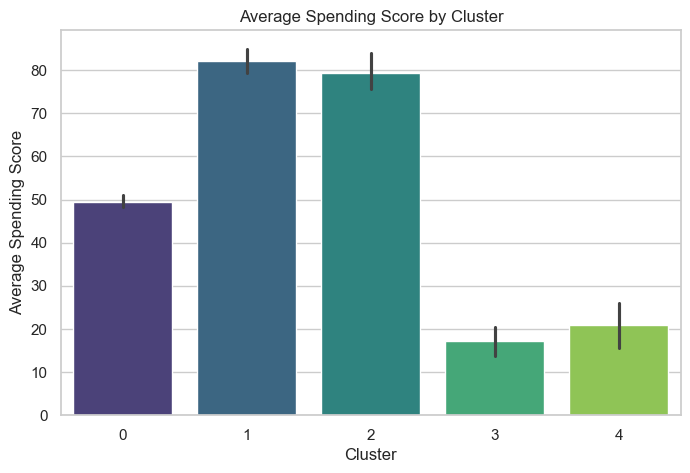

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=data, estimator=np.mean, palette='viridis')
plt.title('Average Spending Score by Cluster')
plt.ylabel('Average Spending Score')
plt.xlabel('Cluster')
plt.show()



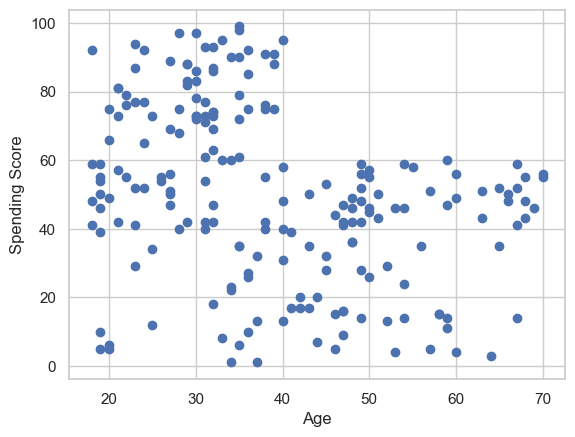

In [9]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [10]:
km = KMeans(n_clusters= 5)
predicted = km.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [11]:
data['Cluster'] = predicted
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


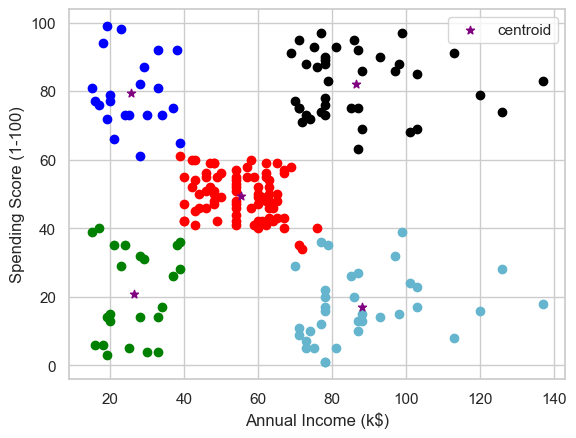

In [12]:
data1 = data[data.Cluster == 0]
data2 = data[data.Cluster == 1]
data3 = data[data.Cluster == 2]
data4 = data[data.Cluster == 3]
data5 = data[data.Cluster == 4]

plt.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], color='green')
plt.scatter(data2['Annual Income (k$)'], data2['Spending Score (1-100)'], color='red')
plt.scatter(data3['Annual Income (k$)'], data3['Spending Score (1-100)'], color='black')
plt.scatter(data4['Annual Income (k$)'], data4['Spending Score (1-100)'], color='c')
plt.scatter(data5['Annual Income (k$)'], data5['Spending Score (1-100)'], color='blue')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()

C:\Users\Vikram\AppData\Local\Temp\ipykernel_12844\2236944601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='Pastel1')


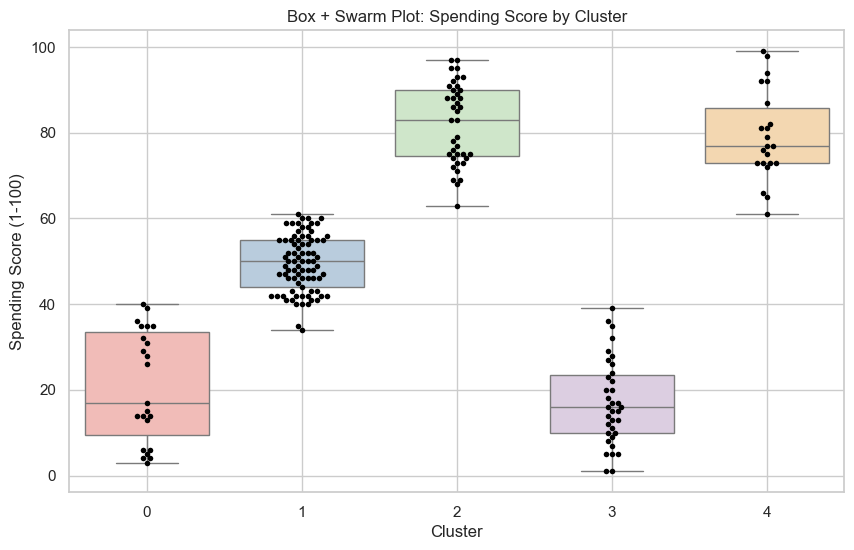

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='Pastel1')
sns.swarmplot(x='Cluster', y='Spending Score (1-100)', data=data, color='black', size=4)
plt.title('Box + Swarm Plot: Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

C:\Users\Vikram\AppData\Local\Temp\ipykernel_12844\1189829531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='Pastel2')


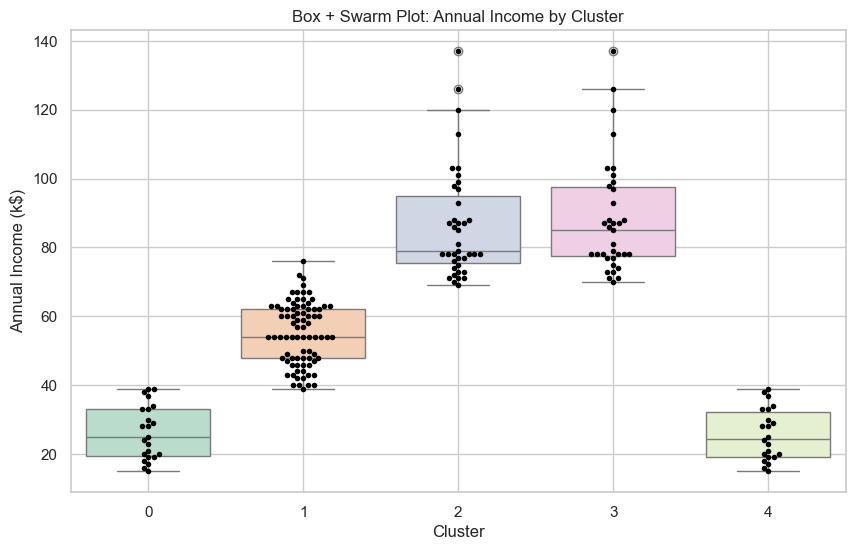

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='Pastel2')
sns.swarmplot(x='Cluster', y='Annual Income (k$)', data=data, color='black', size=4)
plt.title('Box + Swarm Plot: Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.show()


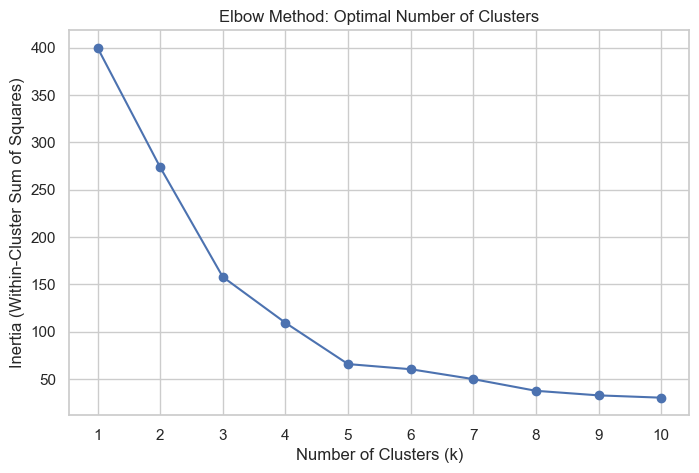

In [15]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()